<a href="https://colab.research.google.com/github/rachelhakes/Machine-Learning/blob/main/Pipeline_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline 1
## Noramlization, outlier handling, scaling

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#### you should change data_path to point to your OWN data file
data_path = '/content/drive/MyDrive/Classroom/pipeline.csv'
features_df = pd.read_csv(data_path, index_col=0)
features_df

,C1',C4,C5',C6',C7,T1',T2',T3',S1',S2',S3',S4',S5',S6'
0,2.086360,0.029074,3.864345,11.111111,51.345,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,0.529915,0.446043,0.841727
1,2.413300,-0.013352,12.028832,0.000000,25.936,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,0.293388,0.299578,1.021097
2,1.954243,0.020715,3.369134,0.000000,7.378,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,1.848485,1.016667,0.550000
3,2.320146,0.020023,3.299697,0.000000,8.526,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,1.355932,0.727273,0.536364
4,1.903090,-0.034895,3.726269,5.000000,632.298,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,0.449664,0.401198,0.892216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2.501059,0.004670,3.963872,20.000000,186.101,0.612663,0.920952,0.050603,0.006512,0.007935,0.012950,0.820755,0.502890,0.612717
656,1.991226,0.058689,4.679726,0.000000,25.461,0.647177,0.906227,0.056770,0.005069,0.009124,0.012527,0.555556,0.404624,0.728324
657,2.049218,0.030425,3.673544,0.000000,55.431,0.647761,0.889600,0.047976,0.004191,0.009044,0.009926,0.463415,0.422222,0.911111
658,1.892095,0.032284,4.217684,18.750000,117.857,0.710938,0.909412,0.043178,0.006773,0.005362,0.014110,1.263158,0.480000,0.380000


In [ ]:
## look at skewness
features_df.skew(axis=0)

C1'     0.132069
C4     -0.477892
C5'    13.405536
C6'     4.372685
C7     12.163784
T1'    -1.595377
T2'    -5.993284
T3'     0.583379
S1'     0.935823
S2'     1.206660
S3'     1.395926
S4'     1.745261
S5'     1.037019
S6'     1.844150
dtype: float64

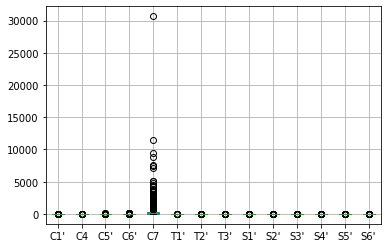

In [ ]:
features_df.boxplot();

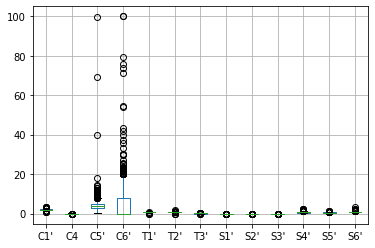

In [ ]:
# boxplots without C7
features_df[['C1\'', 'C4', 'C5\'', 'C6\'', 'T1\'', 'T2\'', 'T3\'', 'S1\'', 'S2\'', 'S3\'', 'S4\'', 'S5\'', 'S6\'']].boxplot();

In [ ]:
# Normalization
# can just call power transofrmer and fit transform on df
def power_transformer(df, method='yeo-johnson'):
  #think about the hardcoded colums

  pt = PowerTransformer(method=method, standardize=False)
  features_trans = pt.fit_transform(df)
  return pd.DataFrame(features_trans, columns=['C1\'', 'C4', 'C5\'', 'C6\'', 'C7', 'T1\'', 'T2\'', 'T3\'', 'S1\'', 'S2\'', 'S3\'', 'S4\'', 'S5\'', 'S6\''])


In [ ]:
features_df = power_transformer(features_df)

In [ ]:
##### must be used after yeo-johnson
## z-score outlier detection
## assumes normal distribution
def outlier_detection(df):
  for col in df.columns:
    #upper bound
    u_bound = df[col].mean() + 3* df[col].std()
    df[col][df[col] > u_bound] = u_bound

    #lower bound
    l_bound = df[col].mean() - 3* df[col].std()
    df[col][df[col] < l_bound] = l_bound
  return df

In [ ]:
features_df.min()

C1'    0.970905
C4    -0.115147
C5'    0.247955
C6'   -0.000000
C7     0.071493
T1'    0.000000
T2'    0.000000
T3'    0.025667
S1'    0.001395
S2'    0.001876
S3'    0.004158
S4'    0.111058
S5'    0.110425
S6'    0.187375
dtype: float64

In [ ]:
# z-score scaling
# assumes normal dis
def z_score(df):
  new_df = df.select_dtypes(include='number').apply(stats.zscore)
  return new_df

In [ ]:
features_df = z_score(features_df)

In [ ]:
features_df.min()

C1'   -3.717044
C4    -3.698019
C5'   -4.269977
C6'   -0.787767
C7    -2.464620
T1'   -4.531382
T2'   -9.379497
T3'   -3.378527
S1'   -3.042270
S2'   -3.853923
S3'   -3.181960
S4'   -3.184267
S5'   -2.916986
S6'   -3.042125
dtype: float64

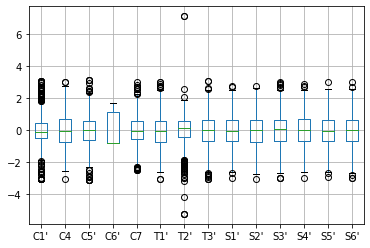

In [ ]:
# boxplot
features_df[['C1\'', 'C4', 'C5\'', 'C6\'', 'C7', 'T1\'', 'T2\'', 'T3\'', 'S1\'', 'S2\'', 'S3\'', 'S4\'', 'S5\'', 'S6\'']].boxplot();

In [ ]:
#### import categorical dataframe
data_path = '/content/drive/MyDrive/Classroom/DATA 6545: Machine Learning for Predictive Analysis SP2022/categorical_df.csv'
categorical_df = pd.read_csv(data_path, index_col=0)
categorical_df.head()

,C2,C3',I4_Manufacturing,I4_Others,I4_Service,I5_Non-techs,I5_Tech
0,1,1,1,0,0,0,1
1,0,0,1,0,0,1,0
2,1,0,1,0,0,1,0
3,1,0,1,0,0,1,0
4,1,1,0,1,0,1,0


In [ ]:
features_final = pd.concat([features_df, categorical_df], axis=1, join='inner')
features_final

,C1',C4,C5',C6',C7,T1',T2',T3',S1',S2',S3',S4',S5',S6',C2,C3',I4_Manufacturing,I4_Others,I4_Service,I5_Non-techs,I5_Tech
0,0.073636,0.626291,0.097847,1.297007,-0.433017,0.102213,0.544610,0.343052,-0.135335,0.230430,-0.084940,-0.247420,-0.059072,0.276522,1,1,1,0,0,0,1
1,1.225480,-0.681795,2.330623,-0.782061,-0.801353,0.165150,0.170783,-0.067614,-1.361873,0.849886,-0.106776,-1.676662,-1.150536,0.821333,0,0,1,0,0,1,0
2,-0.394584,0.347906,-0.208355,-0.782061,-1.430105,0.050182,0.562128,1.338747,2.519122,-1.045422,0.105050,2.497860,2.306042,-0.955602,1,0,1,0,0,1,0
3,0.898240,0.325339,-0.255280,-0.782061,-1.362114,-1.201845,0.848335,1.322031,2.040231,-0.617205,0.782969,1.952381,1.369368,-1.027587,1,0,1,0,0,1,0
4,-0.576319,-1.254095,0.017120,0.993785,1.021200,-0.621120,-0.203518,-0.495993,-0.377975,0.523688,0.049306,-0.660300,-0.360648,0.442848,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1.533110,-0.157405,0.154025,1.456569,0.295472,-0.287377,0.993528,-0.184983,0.809081,-0.265944,0.662977,0.845334,0.288651,-0.643802,1,0,0,0,1,1,0
656,-0.263348,1.701503,0.515363,-0.782061,-0.811110,0.200664,0.446749,0.690467,-0.009260,0.203033,0.519465,-0.127841,-0.336683,-0.141487,1,0,1,0,0,0,1
657,-0.057827,0.672288,-0.014603,-0.782061,-0.390852,0.209246,-0.162425,-0.584834,-0.613489,0.173527,-0.519619,-0.585068,-0.216058,0.502308,0,1,1,0,0,0,1
658,-0.615417,0.736040,0.290252,1.441396,0.032567,1.205673,0.564405,-1.360461,0.936687,-1.542472,1.025282,1.811368,0.152978,-1.981276,1,1,0,1,0,1,0


In [ ]:
#### you should change data_path to point to your OWN data file
data_path = '/content/drive/MyDrive/Classroom/DATA 6545: Machine Learning for Predictive Analysis SP2022/targetvariables.csv'
target_variables = pd.read_csv(data_path, index_col=0)
target_variables.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [ ]:
# Import the necessary libraries first
#### Correlation method - for classification chi2 only
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#### RFE method - replace the model with the model you plan to use
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
#### feature importance method
#### this method can be used for both topK and cut-off
from sklearn.linear_model import Ridge
#### specifically tree-based feature importance method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#### for voting
from collections import Counter

In [ ]:
X = features_final.values
y1 = target_variables.Y1.values
y2 = target_variables.Y2.values

In [ ]:
names = ['C1\'', 'C4', 'C5\'', 'C6\'', 'C7', 'T1\'', 'T2\'', 'T3\'', 'S1\'', 'S2\'', 'S3\'', 'S4\'', 'S5\'', 'S6\'','C2','C3\'', 'I4_Manufacturing', 'I4_Others', 'I4_Service', 'I5_Non-techs', 'I5_Tech']

In [ ]:
clf = RandomForestClassifier()

In [ ]:
def feature_selector(X, y, model, names, _method="topk", n=int(X.shape[1]/2), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    #corr_features = list(np.argpartition(SelectKBest(score_func=chi2, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    corr_features = []
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")
  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)
  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[int(f)]:c for f,c in counted}).sort_values(ascending=False)
  selected_idx = sorted([int(f) for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  #print(selected_idx)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])

In [ ]:
x_selected_y1 = feature_selector(X, y1, model=clf, names=names, fit_X=True)
x_selected_y1

Using the Top-K method: 
Selected features by correlation:  []
Selected features by RFE:  ['C4' "C5'" "C6'" 'C7' "T1'" "T2'" "T3'" "S1'" "S2'" "S6'"]
Selected features by Ridge coefficients:  ["S2'" "S5'" 'C2' "S1'" "T1'" "T2'" "C3'" "C5'" 'I4_Service' 'I5_Tech']
Selected features by Extra Tree feature importance:  ["C6'" "S2'" "S6'" "S1'" "C5'" "T2'" 'C4' "S4'" "T3'" "T1'"]
Selected features by Random Forest feature importance:  ["C6'" "S2'" 'C7' "S6'" "T2'" "T3'" 'C4' "C5'" "T1'" "S1'"]
C5'    4
T1'    4
T2'    4
S1'    4
S2'    4
C4     3
C6'    3
T3'    3
S6'    3
C7     2
dtype: int64


array([[ 0.62629144,  0.09784696,  1.2970074 , ..., -0.13533458,
         0.23042993,  0.27652191],
       [-0.68179477,  2.33062272, -0.78206147, ..., -1.36187308,
         0.84988572,  0.82133312],
       [ 0.34790639, -0.20835461, -0.78206147, ...,  2.51912225,
        -1.04542247, -0.95560185],
       ...,
       [ 0.67228769, -0.01460331, -0.78206147, ..., -0.61348856,
         0.17352677,  0.5023079 ],
       [ 0.73604008,  0.29025183,  1.44139628, ...,  0.93668654,
        -1.54247238, -1.98127579],
       [ 0.47887215, -0.29614727,  1.11514998, ...,  1.49184314,
         0.09468438, -0.46378552]])

In [ ]:
x_selected_y2 = feature_selector(X, y2, model=clf, names=names, fit_X=True)
x_selected_y2

Using the Top-K method: 
Selected features by correlation:  []
Selected features by RFE:  ['C4' "C5'" 'C7' "T1'" "T2'" "T3'" "S2'" "S3'" "S4'" "S6'"]
Selected features by Ridge coefficients:  ["S4'" "S6'" "S3'" "C6'" 'C2' 'I4_Service' 'C4' 'I4_Manufacturing' "C5'"
 'I5_Tech']
Selected features by Extra Tree feature importance:  ["C6'" 'C4' "C5'" "S2'" "S6'" 'C7' "T3'" "T1'" "S3'" "C1'"]
Selected features by Random Forest feature importance:  ['C4' "C5'" "S6'" "T2'" "S2'" "T3'" "T1'" "C6'" "C1'" "S1'"]
C4     4
C5'    4
S6'    4
T1'    3
T3'    3
S2'    3
S3'    3
C6'    3
C7     2
T2'    2
dtype: int64


array([[ 0.62629144,  0.09784696,  1.2970074 , ...,  0.23042993,
        -0.08493986,  0.27652191],
       [-0.68179477,  2.33062272, -0.78206147, ...,  0.84988572,
        -0.10677612,  0.82133312],
       [ 0.34790639, -0.20835461, -0.78206147, ..., -1.04542247,
         0.10505012, -0.95560185],
       ...,
       [ 0.67228769, -0.01460331, -0.78206147, ...,  0.17352677,
        -0.51961876,  0.5023079 ],
       [ 0.73604008,  0.29025183,  1.44139628, ..., -1.54247238,
         1.0252824 , -1.98127579],
       [ 0.47887215, -0.29614727,  1.11514998, ...,  0.09468438,
         0.85603978, -0.46378552]])

In [ ]:
features_concat = pd.concat([features_df, categorical_df, target_variables], axis=1, join='inner')
features_concat

,C1',C4,C5',C6',C7,T1',T2',T3',S1',S2',S3',S4',S5',S6',C2,C3',I4_Manufacturing,I4_Others,I4_Service,I5_Non-techs,I5_Tech,Y1,Y2
0,0.073636,0.626291,0.097847,1.297007,-0.433017,0.102213,0.544610,0.343052,-0.135335,0.230430,-0.084940,-0.247420,-0.059072,0.276522,1,1,1,0,0,0,1,0,1
1,1.225480,-0.681795,2.330623,-0.782061,-0.801353,0.165150,0.170783,-0.067614,-1.361873,0.849886,-0.106776,-1.676662,-1.150536,0.821333,0,0,1,0,0,1,0,1,0
2,-0.394584,0.347906,-0.208355,-0.782061,-1.430105,0.050182,0.562128,1.338747,2.519122,-1.045422,0.105050,2.497860,2.306042,-0.955602,1,0,1,0,0,1,0,1,0
3,0.898240,0.325339,-0.255280,-0.782061,-1.362114,-1.201845,0.848335,1.322031,2.040231,-0.617205,0.782969,1.952381,1.369368,-1.027587,1,0,1,0,0,1,0,1,1
4,-0.576319,-1.254095,0.017120,0.993785,1.021200,-0.621120,-0.203518,-0.495993,-0.377975,0.523688,0.049306,-0.660300,-0.360648,0.442848,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1.533110,-0.157405,0.154025,1.456569,0.295472,-0.287377,0.993528,-0.184983,0.809081,-0.265944,0.662977,0.845334,0.288651,-0.643802,1,0,0,0,1,1,0,0,1
656,-0.263348,1.701503,0.515363,-0.782061,-0.811110,0.200664,0.446749,0.690467,-0.009260,0.203033,0.519465,-0.127841,-0.336683,-0.141487,1,0,1,0,0,0,1,0,0
657,-0.057827,0.672288,-0.014603,-0.782061,-0.390852,0.209246,-0.162425,-0.584834,-0.613489,0.173527,-0.519619,-0.585068,-0.216058,0.502308,0,1,1,0,0,0,1,0,1
658,-0.615417,0.736040,0.290252,1.441396,0.032567,1.205673,0.564405,-1.360461,0.936687,-1.542472,1.025282,1.811368,0.152978,-1.981276,1,1,0,1,0,1,0,1,0


In [ ]:
selected_y1 = features_concat[['C6\'', 'S2\'', 'C4', 'C7', 'Y1', 'Y2']]
selected_y1.head()

,C6',S2',C4,C7,Y1,Y2
0,1.297007,0.230430,0.626291,-0.433017,0,1
1,-0.782061,0.849886,-0.681795,-0.801353,1,0
2,-0.782061,-1.045422,0.347906,-1.430105,1,0
3,-0.782061,-0.617205,0.325339,-1.362114,1,1
4,0.993785,0.523688,-1.254095,1.021200,0,1


In [ ]:
# define features and target
X = selected_y1.iloc[:,:-2].values
y = selected_y1.iloc[:,-2].values
# if you want a secondary target
### y1 = ...

In [ ]:
### y should be binary
assert len(np.unique(y)) == 2

In [ ]:
X.shape, y.shape

((639, 4), (639,))

In [ ]:
# balance the data
from imblearn.over_sampling import SMOTE
# resample/balance the data
# note although we do not balance data this way,
# this works the best for this project
sm = SMOTE(random_state = 2022)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
#X_res.shape, y_res.shape

In [ ]:
# import `logistic regression` model
from sklearn.linear_model import LogisticRegression
# define the model
clf = LogisticRegression(max_iter=2000)

In [ ]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
  '''
  return evaluation results (f1-score or ROC_AUC).
  Built in k-fold evaluation.
  INPUTS:
  ----
  - X: features; DataFrame or Numpy ndarray;
  - y: target; DataFrame or Numpy ndarray;
  - classifier: any sklearn (or its add-on) based classifier
  - k: number of folds in cross validation
  - scoring: evaluation metric ('f1' default or 'roc_auc')
  OUTPUT:
  ----
  bias/variance score of selected metric. Both lower the better
  - bias: mean of the metric over cross validation, measure the accruracy
  - variance: std.ev. of the metric, measure the consistency.
  '''
  scores = []
  for i in range(100):
    #### generate random numbers to shuffle the data for training and test
    np.random.seed(2021)
    random_int = np.random.randint(0,3000)
    #### create cross validation folds
    kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
    #### record the score
    score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
    scores.append(score)
  scores = np.array(scores)
  #### we need to calculate the bias (average score) and viariance (std)
  bias, variance = 1 - round(scores.mean(),4), round(scores.std(),4)
  return(bias, variance)

In [ ]:
# getting averaged f1_score from 10-fold CV (default)
my_eval(X_res, y_res, clf, 10)

(0.5601, 0.0598)

In [ ]:
# getting averaged ROC_AUC from 10-fold CV
my_eval(X_res, y_res, clf, 10, 'roc_auc')

(0.5610999999999999, 0.0514)

In [ ]:
# for evaluation code
#to_csv = features_final.to_csv('/content/drive/MyDrive/Classroom/DATA 6545: Machine Learning for Predictive Analysis SP2022/pipeline1.csv', index = True, encoding='utf-8')